### What is the most common crime in San Francisco?

The first question is what is the most frequent type of crime in the city. First, a bit of understanding of the dataset used for the project.



In [2]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
sns.set_palette('colorblind')

In [4]:
df = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


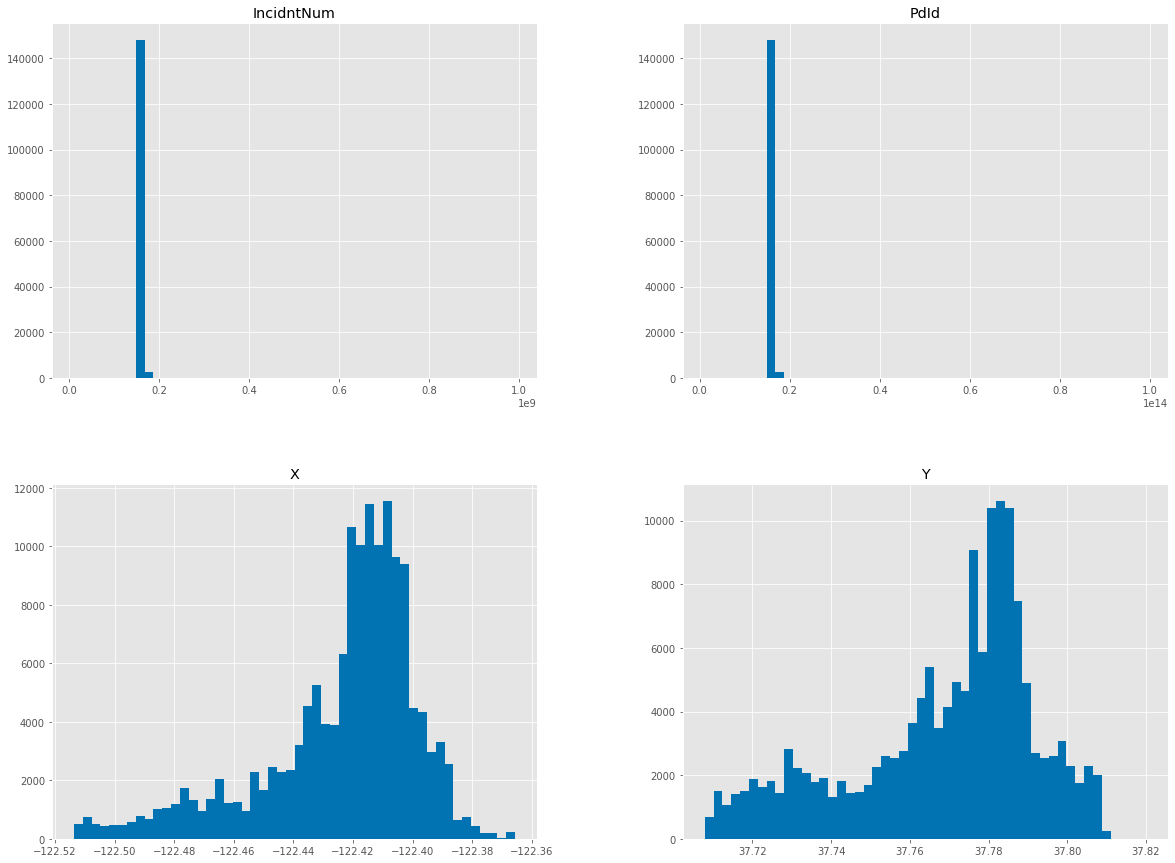

In [5]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [4]:
#Dimension of listing dataset in number of rows and columns
df.shape

(150500, 13)

In [6]:
#Statistical information about numerical variables
df.describe()

,IncidntNum,X,Y,PdId
count,1.505000e+05,150500.000000,150500.000000,1.505000e+05
mean,1.616440e+08,-122.423599,37.768921,1.616440e+13
std,5.535976e+06,0.026210,0.023637,5.535976e+11
min,1.135121e+07,-122.513642,37.707922,1.135121e+12
25%,1.603283e+08,-122.434036,37.756486,1.603283e+13
50%,1.606541e+08,-122.416903,37.775421,1.606541e+13
75%,1.609764e+08,-122.406605,37.785063,1.609764e+13
max,9.910090e+08,-122.365565,37.819975,9.910090e+13


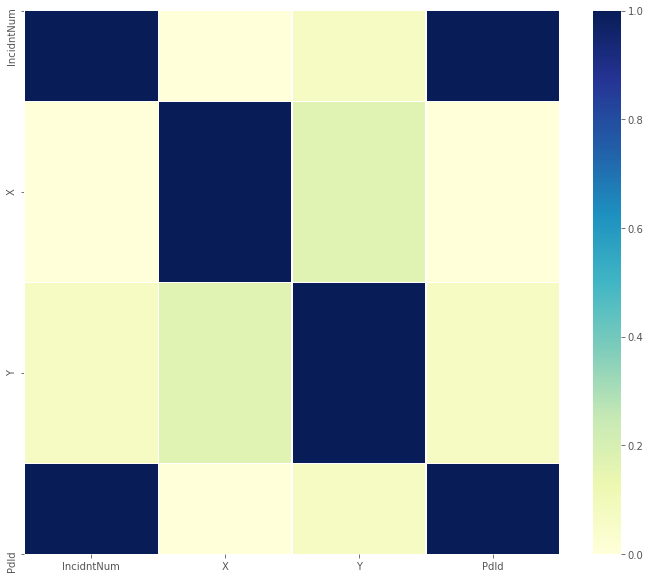

In [7]:
#Map of correlation beetwen variables
corrmat = df.corr(method = 'spearman')
f, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(corrmat, ax = ax, cmap = "YlGnBu", linewidths = 0.1)

The first question of interest: what is the most common crime in San Francisco?

Let's see how many of each type of crime were recorded in 2016.

In [8]:
study = df['Category'].value_counts().reset_index()
study.head(20)

,index,Category
0,LARCENY/THEFT,40409
1,OTHER OFFENSES,19599
2,NON-CRIMINAL,17866
3,ASSAULT,13577
4,VANDALISM,8589
5,VEHICLE THEFT,6419
6,WARRANTS,5914
7,BURGLARY,5802
8,SUSPICIOUS OCC,5782
9,MISSING PERSON,4338


In [9]:
# Let's change the name of the columns for a clearer view
study.rename(columns={'index': 'Crime', 'Category': 'Crime Count'}, inplace=True)
study.head()

,Crime,Crime Count
0,LARCENY/THEFT,40409
1,OTHER OFFENSES,19599
2,NON-CRIMINAL,17866
3,ASSAULT,13577
4,VANDALISM,8589


In [17]:
# Now we can calculate what percentage of the total number of crimes represent each group
study['Percentage'] = study['Crime Count']/np.sum(study['Crime Count'])*100
study.head()

,Crime,Crime Count,Percentage
0,LARCENY/THEFT,40409,26.849834
1,OTHER OFFENSES,19599,13.022591
2,NON-CRIMINAL,17866,11.871096
3,ASSAULT,13577,9.021262
4,VANDALISM,8589,5.706977


Text(0.5, 1.0, 'Crime Frequency')

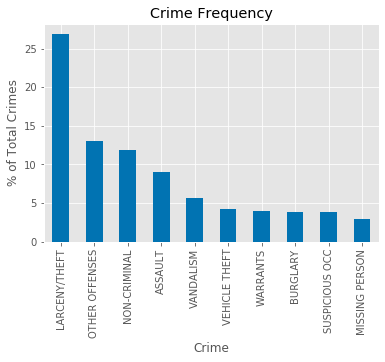

In [18]:
crimeFreqPlot = study[:10].plot.bar('Crime', 'Percentage', legend = False)
crimeFreqPlot.set_ylabel('% of Total Crimes')
crimeFreqPlot.set_title('Crime Frequency')